In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

In [2]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    #If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count.
len(cities)

613

In [7]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
    
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | majene
Processing Record 2 of Set 1 | romitan
Processing Record 3 of Set 1 | tumannyy
City not found. Skipping...
Processing Record 4 of Set 1 | saskylakh
Processing Record 5 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 6 of Set 1 | mataura
Processing Record 7 of Set 1 | sambava
Processing Record 8 of Set 1 | porbandar
Processing Record 9 of Set 1 | albany
Processing Record 10 of Set 1 | hilo
Processing Record 11 of Set 1 | dzhusaly
City not found. Skipping...
Processing Record 12 of Set 1 | jamestown
Processing Record 13 of Set 1 | alta floresta
Processing Record 14 of Set 1 | pevek
Processing Record 15 of Set 1 | chicama
Processing Record 16 of Set 1 | talnakh
Processing Record 17 of Set 1 | srednekolymsk
Processing Record 18 of Set 1 | mecca
Processing Record 19 of Set 1 | odesskoye
Processing Record 20 of Set 1 | suzun
Processing Record 21 of Set 1 | marsh harbour
Proces

Processing Record 32 of Set 4 | mehamn
Processing Record 33 of Set 4 | nago
Processing Record 34 of Set 4 | yeppoon
Processing Record 35 of Set 4 | gat
Processing Record 36 of Set 4 | port moresby
Processing Record 37 of Set 4 | santa maria da boa vista
Processing Record 38 of Set 4 | malinovoye ozero
Processing Record 39 of Set 4 | port hardy
Processing Record 40 of Set 4 | bethel
Processing Record 41 of Set 4 | mkushi
Processing Record 42 of Set 4 | ilulissat
Processing Record 43 of Set 4 | gangakher
Processing Record 44 of Set 4 | ukiah
Processing Record 45 of Set 4 | victoria
Processing Record 46 of Set 4 | royan
Processing Record 47 of Set 4 | lesosibirsk
Processing Record 48 of Set 4 | saint albans
Processing Record 49 of Set 4 | tiksi
Processing Record 50 of Set 4 | bambous virieux
Processing Record 1 of Set 5 | sokolo
Processing Record 2 of Set 5 | erenhot
Processing Record 3 of Set 5 | airai
Processing Record 4 of Set 5 | kotovo
Processing Record 5 of Set 5 | kot kapura
Proces

Processing Record 23 of Set 8 | manoel urbano
Processing Record 24 of Set 8 | koygorodok
Processing Record 25 of Set 8 | borujerd
Processing Record 26 of Set 8 | palauig
Processing Record 27 of Set 8 | namibe
Processing Record 28 of Set 8 | noumea
Processing Record 29 of Set 8 | mys shmidta
City not found. Skipping...
Processing Record 30 of Set 8 | rio pomba
Processing Record 31 of Set 8 | cayenne
Processing Record 32 of Set 8 | barcelos
Processing Record 33 of Set 8 | hailar
Processing Record 34 of Set 8 | middlebury
Processing Record 35 of Set 8 | bako
Processing Record 36 of Set 8 | owen sound
Processing Record 37 of Set 8 | bonavista
Processing Record 38 of Set 8 | marystown
Processing Record 39 of Set 8 | bilma
Processing Record 40 of Set 8 | harper
Processing Record 41 of Set 8 | okhotsk
Processing Record 42 of Set 8 | camacha
Processing Record 43 of Set 8 | brandfort
Processing Record 44 of Set 8 | faya
Processing Record 45 of Set 8 | maceio
Processing Record 46 of Set 8 | gera

Processing Record 16 of Set 12 | simao
Processing Record 17 of Set 12 | grand centre
City not found. Skipping...
Processing Record 18 of Set 12 | kamaishi
Processing Record 19 of Set 12 | manokwari
Processing Record 20 of Set 12 | caravelas
Processing Record 21 of Set 12 | komsomolskiy
Processing Record 22 of Set 12 | rio muerto
Processing Record 23 of Set 12 | batemans bay
Processing Record 24 of Set 12 | saint-augustin
Processing Record 25 of Set 12 | dingle
Processing Record 26 of Set 12 | baturaja
Processing Record 27 of Set 12 | arkhangelsk
Processing Record 28 of Set 12 | falealupo
City not found. Skipping...
Processing Record 29 of Set 12 | whitehorse
Processing Record 30 of Set 12 | luton
Processing Record 31 of Set 12 | kathu
Processing Record 32 of Set 12 | mastic beach
Processing Record 33 of Set 12 | kavaratti
Processing Record 34 of Set 12 | mercedes
Processing Record 35 of Set 12 | sterling
Processing Record 36 of Set 12 | ancud
Processing Record 37 of Set 12 | north bend

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Majene,-3.54,118.97,78.58,85,62,11.12,ID,2020-07-08 15:08:48
1,Romitan,39.93,64.38,96.80,19,0,4.70,UZ,2020-07-08 14:59:57
2,Saskylakh,71.92,114.08,58.53,62,30,13.47,RU,2020-07-08 14:59:43
3,Mataura,-46.19,168.86,39.00,83,98,3.00,NZ,2020-07-08 14:59:33
4,Sambava,-14.27,50.17,73.89,87,83,14.67,MG,2020-07-08 15:08:48
5,Porbandar,21.64,69.61,83.80,83,70,16.13,IN,2020-07-08 15:05:21
6,Albany,42.60,-73.97,81.00,69,40,8.05,US,2020-07-08 14:59:27
7,Hilo,19.73,-155.09,73.40,78,90,3.36,US,2020-07-08 14:54:55
8,Jamestown,42.10,-79.24,75.20,73,1,5.82,US,2020-07-08 14:57:48
9,Alta Floresta,-9.88,-56.09,90.00,34,15,4.18,BR,2020-07-08 15:08:49


In [9]:
# Reorder columns.
city_data_df = city_data_df[["City", "Country", "Date", "Lat", "Lng", "Max Temp",
                 "Humidity", "Cloudiness", "Wind Speed"]]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Majene,ID,2020-07-08 15:08:48,-3.54,118.97,78.58,85,62,11.12
1,Romitan,UZ,2020-07-08 14:59:57,39.93,64.38,96.80,19,0,4.70
2,Saskylakh,RU,2020-07-08 14:59:43,71.92,114.08,58.53,62,30,13.47
3,Mataura,NZ,2020-07-08 14:59:33,-46.19,168.86,39.00,83,98,3.00
4,Sambava,MG,2020-07-08 15:08:48,-14.27,50.17,73.89,87,83,14.67
5,Porbandar,IN,2020-07-08 15:05:21,21.64,69.61,83.80,83,70,16.13
6,Albany,US,2020-07-08 14:59:27,42.60,-73.97,81.00,69,40,8.05
7,Hilo,US,2020-07-08 14:54:55,19.73,-155.09,73.40,78,90,3.36
8,Jamestown,US,2020-07-08 14:57:48,42.10,-79.24,75.20,73,1,5.82
9,Alta Floresta,BR,2020-07-08 15:08:49,-9.88,-56.09,90.00,34,15,4.18


In [10]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [11]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [18]:
import time

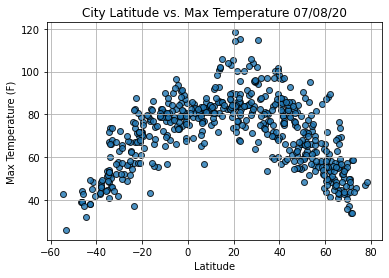

In [19]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

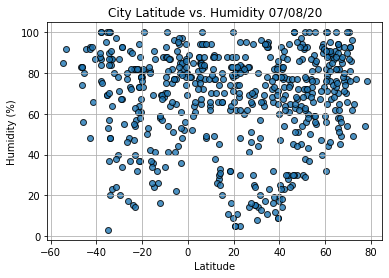

In [20]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

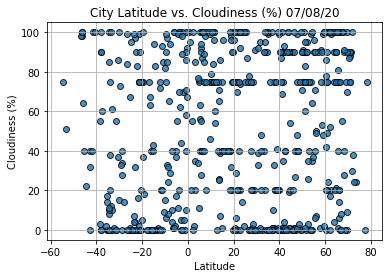

In [21]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

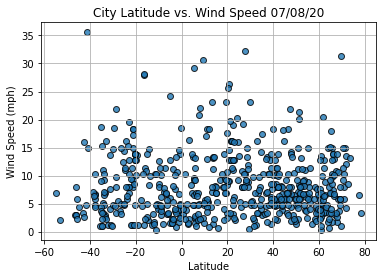

In [22]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()